#  Ματαιότητης Ματαιοτήτων

* Προσαρμογή στην Python των [γραφημάτων θνησιμότητας](https://kieranhealy.org/blog/archives/2018/12/04/heatmaps-of-mortality-rates) του [Kieran Healy](https://kieranhealy.org/).

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Θα μελετήσουμε δεδομένα θνησιμότητας τα οποία είναι διαθέσιμα από τον ιστότοπο [Human Mortality Database](https://www.mortality.org/), για διάφορες χώρες, σε διαφορετικά χρονικά διαστήματα.

* Τα δεδομένα διατίθενται ελεύθερα, αλλά οι επιμελητές τους ζητούν από τους χρήστες να μην τα διαμοιράζουν οι ίδιοι περαιτέρω.

* Έτσι, σεβόμενοι την επιθυμία τους, δεν διαθέτουμε τα δεδομένα μέσω του ιστοτόπου του μαθήματος. Μπορείτε εύκολα να τα κατεβάσετε οι ίδιοι για να απαραράξετε ό,τι ακολουθεί.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata
import math

import matplotlib.pyplot as plt

import seaborn as sns

* Εμάς μας ενδιαφέρουν τα αρχεία με δεδομένα θνησιμότητας.

* Τα αρχεία αυτά ονομάζονται «Death Rates».

* Θα χρησιμοποιήσουμε το αρχείο για τη Γαλλία.

* Το αρχείο είναι το `FRATNP.Mx_1x1.txt`.

In [6]:
lex = pd.read_table("FRATNP.Mx_1x1.txt", skiprows=2, sep=r"\s+", na_values=".")

* Ιδού πώς είναι τα δεδομένα.

* Για κάθε χρονιά και κάθε ηλικία έχουμε την αντίστοιχη θνησιμότητα, δηλαδή το λόγο του πληθυσμού που πέθανε στην ηλικία αυτή προς τον πληθυσμό που θα μπορούσε να πεθάνει στην ηλικία αυτή.

In [7]:
lex.head()

,Year,Age,Female,Male,Total
0,1816,0,0.186986,0.222931,0.205344
1,1816,1,0.046702,0.046670,0.046685
2,1816,2,0.033928,0.034306,0.034120
3,1816,3,0.022912,0.023155,0.023035
4,1816,4,0.015995,0.016075,0.016035


* Αν ελέγξουμε τα δεδομένα θα διαπιστώσουμε ότι οι ευτυχείς που ζουν από τα 110 και πάνω είναι όλοι μαζί στην ηλικία `110+`.

* Ας θεωρήσουμε ότι είναι στα 110.

In [8]:
lex.loc[lex['Age'] == '110+', 'Age'] = 110

* Τώρα μπορούμε να μετατρέψουμε τη στήλη `Age` σε ακέραιο αριθμό.

In [9]:
lex['Age'] = pd.to_numeric(lex['Age'])

* Η μορφή που έχουν αυτή τη στιγμή τα δεδομένα δεν βολεύει για τους σκοπούς της οπτικοποίησης.

* Θα φτιάξουμε ένα νέο `DataFrame`, όπου τα έτη θα είναι στήλες και οι ηλικίες γραμμές.

* Και θα κρατήσουμε μόνο τις ηλικίες μέχρι και τα 100.

In [10]:
mortality_grid = pd.pivot_table(data=lex[lex['Age'] <= 100], 
                                index='Age',
                                columns='Year',
                                values='Male')
mortality_grid.shape

(101, 207)

* Η αρχή του `DataFrame`:

In [11]:
mortality_grid.head(5)

Year,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Age,,,,,,,,,,,,,,,,,,,,,
0,0.222931,0.217954,0.216629,0.234458,0.213029,0.213841,0.241128,0.221829,0.234507,0.223781,...,0.003926,0.003802,0.003989,0.003975,0.004049,0.004178,0.004157,0.003810,0.004033,0.004228
1,0.046670,0.053905,0.061260,0.066978,0.058200,0.056375,0.059970,0.058001,0.062447,0.064879,...,0.000277,0.000288,0.000288,0.000212,0.000284,0.000282,0.000321,0.000189,0.000245,0.000246
2,0.034306,0.038601,0.041421,0.046210,0.040766,0.041691,0.042485,0.039162,0.043943,0.045941,...,0.000184,0.000153,0.000191,0.000211,0.000168,0.000185,0.000220,0.000184,0.000169,0.000195
3,0.023155,0.027090,0.028248,0.030090,0.027286,0.028215,0.029681,0.026570,0.028650,0.030954,...,0.000152,0.000130,0.000157,0.000151,0.000124,0.000111,0.000116,0.000091,0.000115,0.000156
4,0.016075,0.018917,0.020125,0.021382,0.018908,0.019647,0.020692,0.019115,0.020021,0.021067,...,0.000127,0.000118,0.000112,0.000108,0.000084,0.000128,0.000139,0.000120,0.000125,0.000086


* Και το τέλος:

In [12]:
mortality_grid.tail(5)

Year,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Age,,,,,,,,,,,,,,,,,,,,,
96,0.353281,0.391148,0.311865,0.375152,0.379127,0.321904,0.359317,0.378642,0.358133,0.396581,...,0.323181,0.310040,0.336270,0.332929,0.333335,0.333388,0.321000,0.363356,0.328681,0.341868
97,0.377493,0.450635,0.357256,0.433953,0.447469,0.382162,0.394729,0.441490,0.392197,0.456061,...,0.379631,0.350234,0.359685,0.366765,0.359034,0.359849,0.366149,0.375496,0.355101,0.379877
98,0.407527,0.517080,0.433014,0.517852,0.537518,0.471528,0.449547,0.510380,0.428021,0.522651,...,0.394270,0.379839,0.400483,0.404899,0.396963,0.382673,0.376709,0.419564,0.396665,0.415913
99,0.451876,0.610657,0.545001,0.652396,0.680141,0.584112,0.552438,0.600798,0.475392,0.600765,...,0.420104,0.401029,0.445684,0.476349,0.427736,0.456025,0.441112,0.464600,0.410297,0.450934
100,0.387128,0.502182,0.582325,0.476503,0.535256,0.343834,0.437913,0.301182,0.395120,0.469188,...,0.456655,0.439701,0.463067,0.500299,0.425956,0.478703,0.471568,0.509582,0.478911,0.520410


* Για την οπτικοποίηση, θέλουμε να μετατρέψουμε τις θνησιμότητες από το 1 έως το 100. 

* Για να το κάνουμε αυτό, θα υλοποιήσουμε τη μέθοδο `ntile()`, [όπως ορίζεται στον SQL Server](https://blogs.msdn.microsoft.com/craigfr/2008/03/31/ranking-functions-rank-dense_rank-and-ntile/) και [έχει μεταφερθεί στο R](https://github.com/tidyverse/dplyr/issues/103).

In [70]:
def ntile(x, n):
    return np.floor(n * (rankdata(x, method='ordinal') - 1) / len(x)) + 1

def ntilep(x, n):
    """Pandas version using qcut"""
    return pd.qcut(x, n, labels=False) + 1  # +1 to start from 1 instead of 0

* Για παράδειγμα:

In [ ]:
x = [5, 1, 3, 2, 2]
print(x)
ntile(x, 2)


[5, 1, 3, 2, 2]


array([2, 1, 2, 1, 1])

* Καθώς θέλουμε να εφαρμόσουμε το `ntile()` σε όλα τα δεδομένα (και όχι μόνο ανά γραμμές ή ανά στήλες), μετατρέπουμε τα δεδομένα σε έναν μονοδιάστατο πίνακα, εφαρμόζουμε το `ntile()` στον μονοδιάστατο πίνακα, και μετά επαναφέρουμε τα δεδομένα στις αρχικές τους διαστάσεις.

In [15]:
dims  = mortality_grid.shape
print(dims)
mortality_grid_binned = ntile(mortality_grid.values.ravel(), 100).reshape(dims)
print(mortality_grid_binned.min(), mortality_grid_binned.max())
mortality_grid_binned

(101, 207)
1.0 100.0


array([[86., 85., 85., ..., 19., 20., 21.],
       [67., 69., 71., ...,  2.,  3.,  3.],
       [63., 64., 66., ...,  2.,  2.,  2.],
       ...,
       [95., 98., 96., ..., 96., 95., 96.],
       [97., 99., 99., ..., 97., 95., 97.],
       [94., 98., 99., ..., 98., 98., 98.]], shape=(101, 207))

* Και έτσι μπορούμε εύκολα να απεικονίσουμε τα δεδομένα μας χρησιμοποιώντας ένα *θερμοχάρτη* (heatmap) με το seaborn.

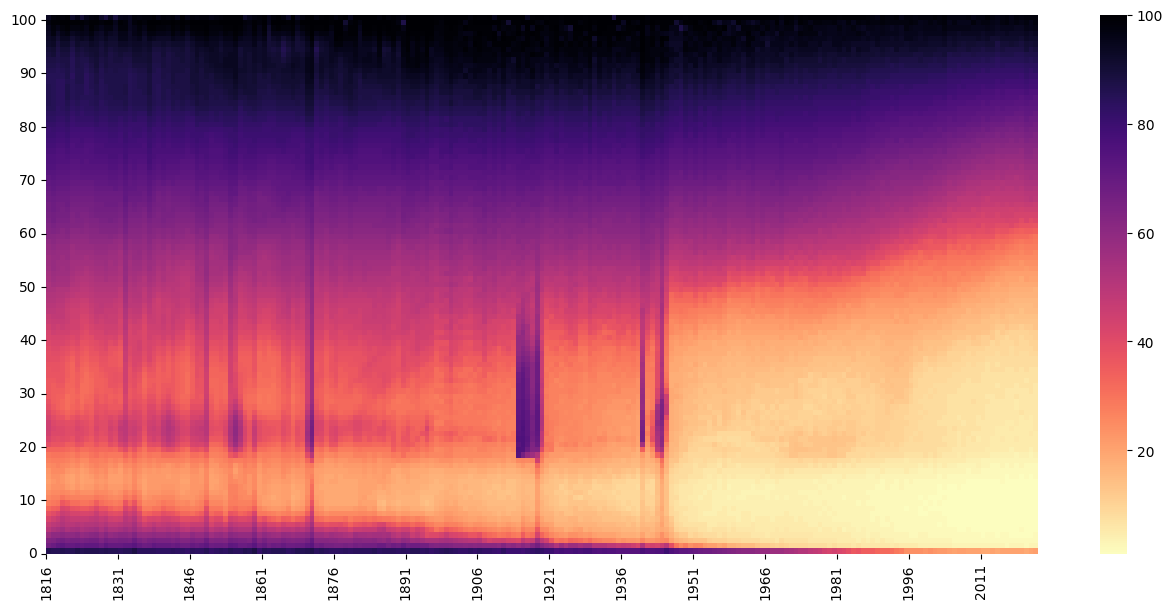

In [16]:
fig = plt.figure(figsize=(16, 7))
ax = fig.gca()
sns.heatmap(data=mortality_grid_binned,
            cmap='magma_r',
            cbar=True,
            ax=ax)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels(np.arange(0, 101, 10))
ax.set_xticks(np.arange(0, 200, 15))
ax.set_xticklabels(np.arange(1816, 2017, 15))
ax.invert_yaxis()

* Μπορούμε να γράψουμε μια συνάρτηση για την παραγωγή του διαγράμματος, ώστε εύκολα να φτιάχνουμε διαγράμματα για όποια χώρα θέλουμε.

* Η συνάρτηση θα παίρνει ως παραμέτρους τη χώρα, το αρχείο της χώρας, το φύλο (`Male`, `Female`, or `Total`), και τις διαστάσεις του γραφήματος.

In [72]:
def lex_heatmap(country, data_file, sex, width, height):
    
    lex = pd.read_table(data_file, skiprows=2, sep=r"\s+", na_values=".")
    lex.loc[lex['Age'] == '110+', 'Age'] = 110
    lex['Age'] = pd.to_numeric(lex['Age'])
    mortality_grid = pd.pivot_table(data=lex[lex['Age'] <= 100], 
                                    index='Age',
                                    columns='Year',
                                    values=sex)
    
    dims  = mortality_grid.shape
    mortality_grid_binned = ntilep(mortality_grid.values.ravel(), 100).reshape(dims)
   
    fig = plt.figure(figsize=(width, height))
    ax = fig.gca()
    sns.heatmap(data=mortality_grid_binned,
            cmap='magma_r',
            cbar=True,
            ax=ax)
    min_x = mortality_grid.columns.min()
    max_x = mortality_grid.columns.max()
    min_x_label = math.ceil(min_x/5) * 5
    max_x_label = math.floor(max_x/5) * 5
    xtick_labels = np.arange(min_x_label, max_x_label+1, 15)
    xticks = xtick_labels - min_x
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Year', size=16)
    ax.set_ylabel('Age', size=16)
    title = ax.set_title(f'{country}: {sex} {min_x}-{max_x}', size=16)
    title.set_position([0.5, 1.05])
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_yticklabels(np.arange(0, 101, 10), rotation=0)
    return mortality_grid

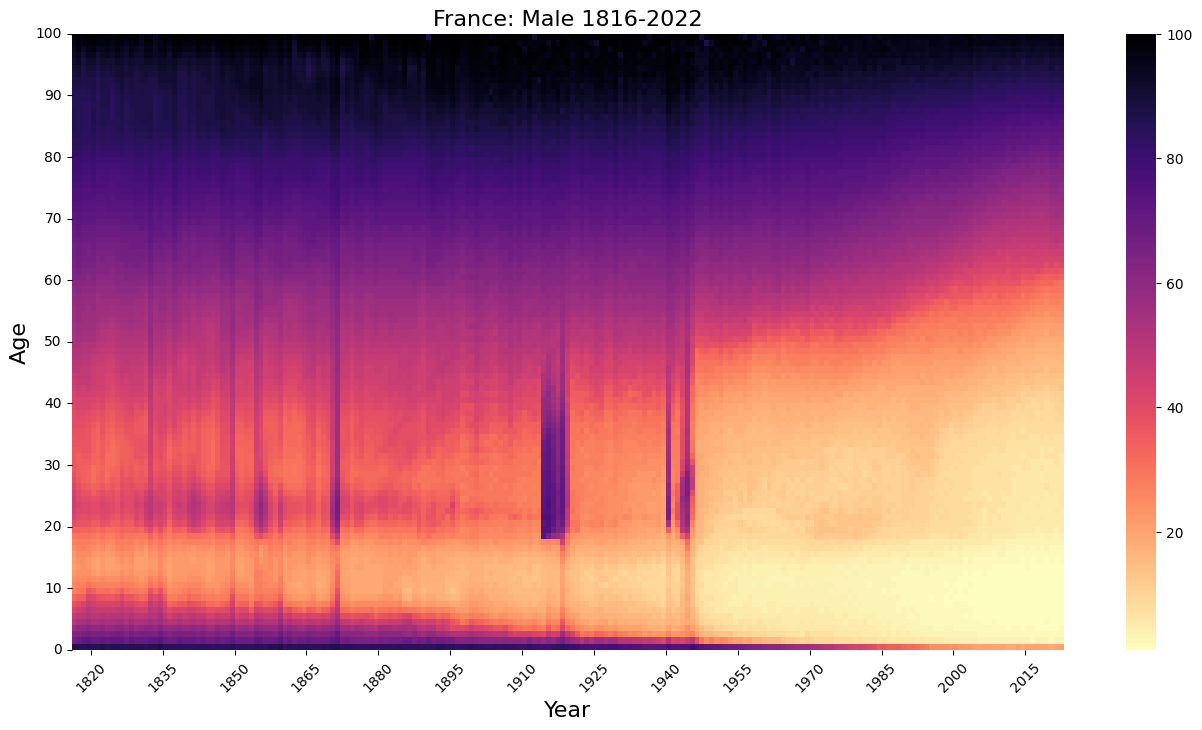

In [73]:
_ = lex_heatmap('France', 'FRATNP.Mx_1x1.txt', 'Male', 16, 8)

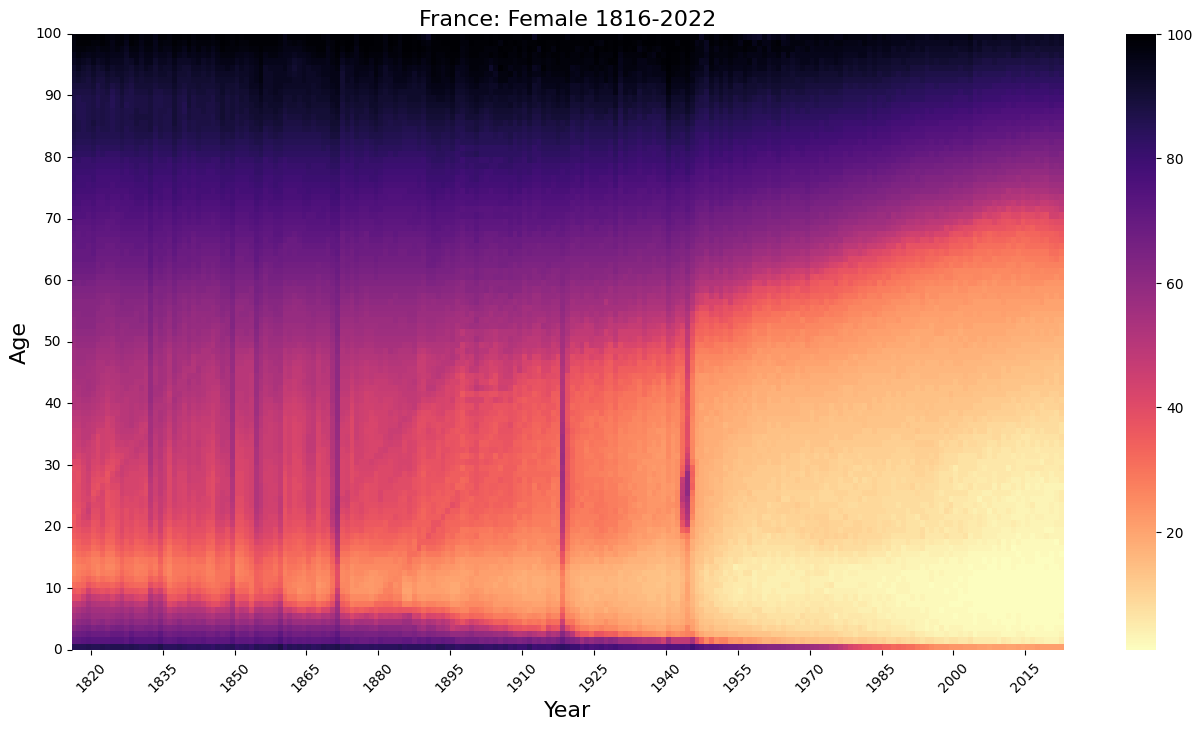

In [74]:
_ = lex_heatmap('France', 'FRATNP.Mx_1x1.txt', 'Female', 16, 8)

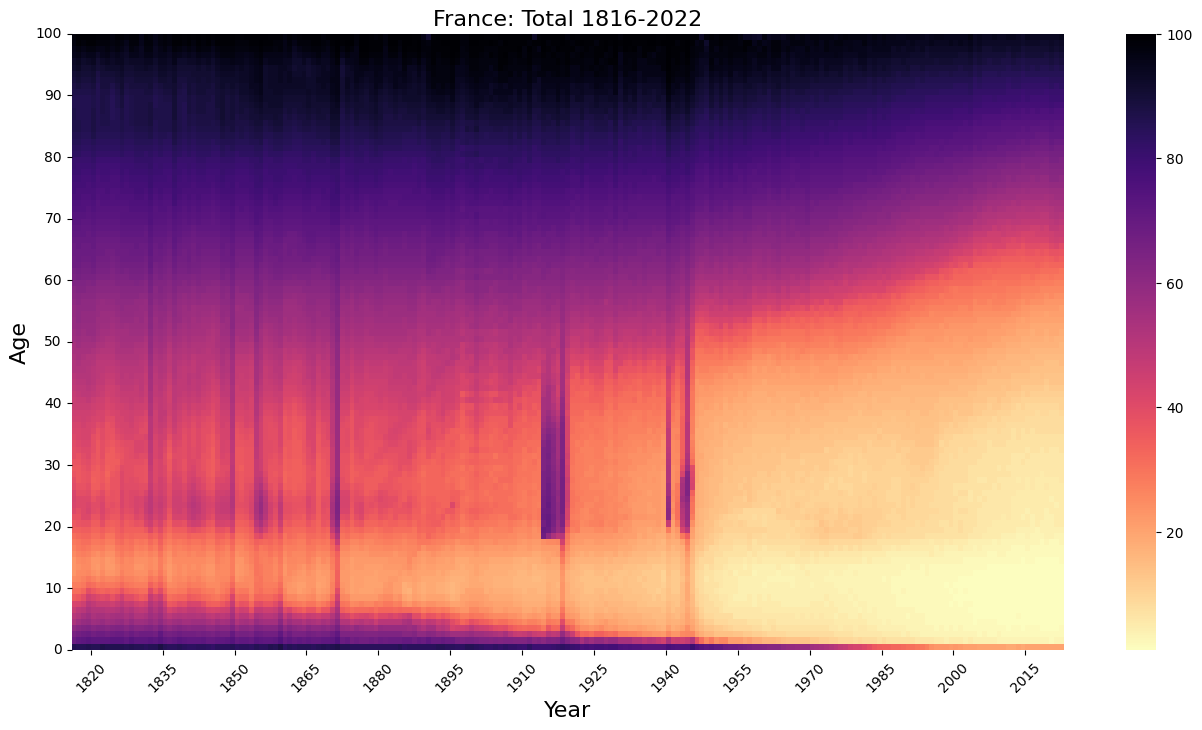

In [75]:
_ = lex_heatmap('France', 'FRATNP.Mx_1x1.txt', 'Total', 16, 8)

* Ωραία θα ήταν να βλέπαμε τι γίνεται και με την Ελλάδα.

* Αλλά δυστυχώς τα δεδομένα καλύπτουν πολύ μικρή χρονική περίοδο...

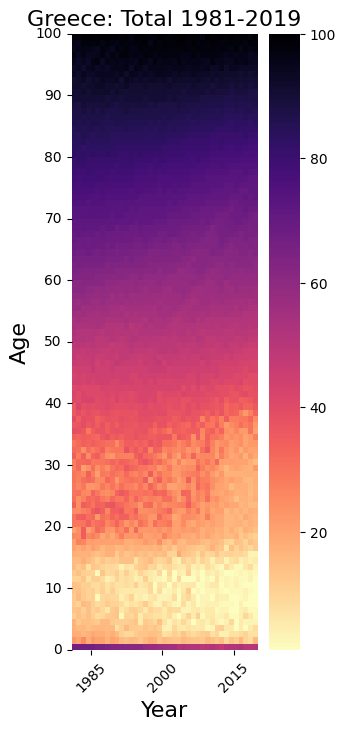

In [76]:
_ = lex_heatmap('Greece', 'GRC.Mx_1x1.txt', 'Total', 3, 8)

* Παίρνουμε καλύτερα αποτελέσματα με τις ΗΠΑ.

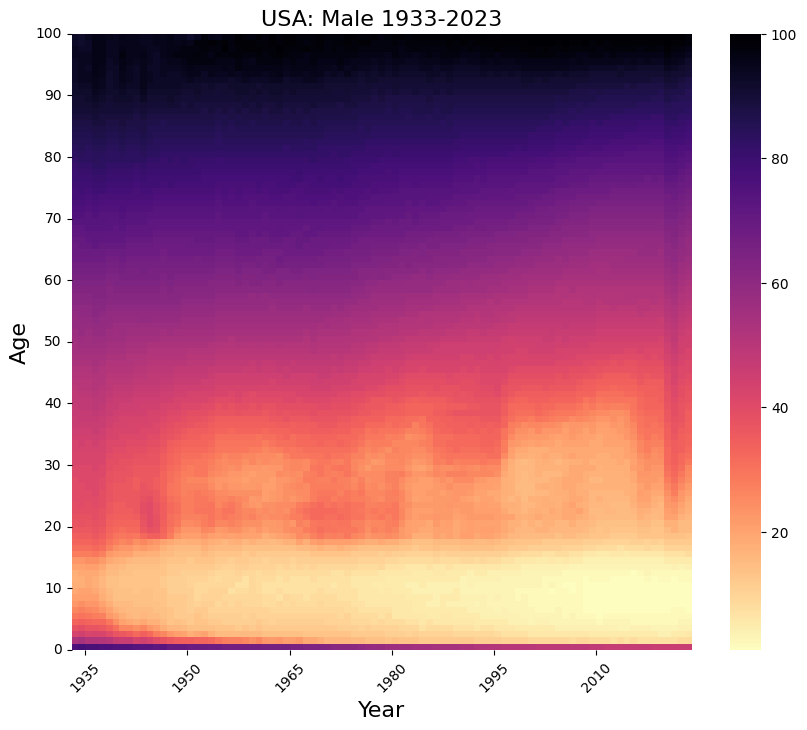

In [77]:
_ = lex_heatmap('USA', 'USA.Mx_1x1.txt', 'Male', 10, 8)

* Ή με την Ολλανδία.

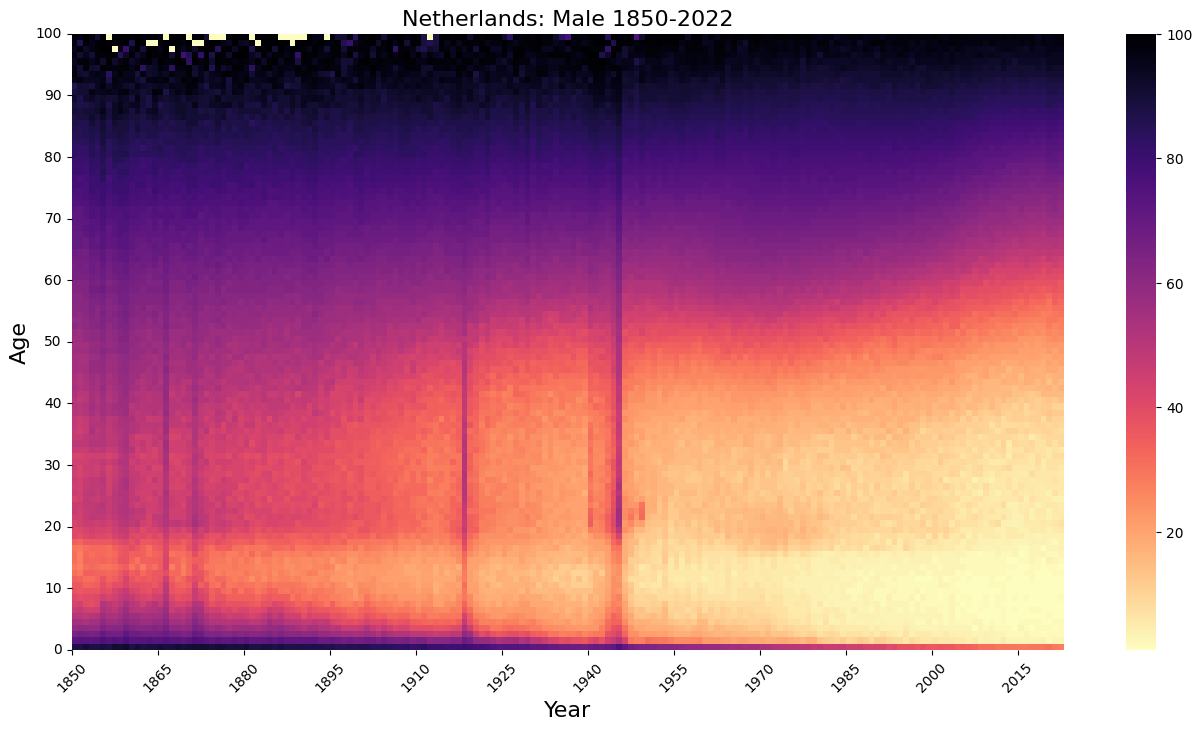

In [78]:
mortality_grid = lex_heatmap('Netherlands', 'NLD.Mx_1x1.txt', 'Male', 16, 8)

* Προσέξτε τα φωτεινά σημεία στην κορυφή του διαγράμματος.

* Φαίνεται ότι εκείνες τις χρονιές, αν έφτανες στα 100 στην Ολλανδία, δεν πέθαινες!

* Πράγματι, μπορούμε να επιβεβαιώσουμε ότι οι αντίστοιχες τιμές είναι μηδέν.

In [79]:
mortality_grid.loc[mortality_grid.index > 95, 1855:1880]

Year,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,...,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880
Age,,,,,,,,,,,,,,,,,,,,,
96,0.514286,0.688525,0.571429,0.196721,0.352941,0.620690,0.324324,0.391304,0.875000,0.652174,...,0.576923,0.146341,0.734694,0.226415,0.615385,0.489796,0.315789,0.875000,0.769231,0.685714
97,0.888889,0.810811,0.000000,0.391304,0.130435,0.409091,0.727273,0.272727,0.620690,0.666667,...,0.315789,0.580645,1.600000,0.960000,0.193548,0.692308,0.909091,0.352941,0.562500,0.782609
98,1.453664,0.600000,0.500000,0.562500,1.000000,0.240000,1.000000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.666667,1.500000,1.500000,0.428571,0.375000,1.384615,0.375000,0.352941
99,0.750000,0.000000,1.200000,1.000000,1.058824,0.666667,1.636364,0.600000,0.545455,0.545455,...,1.000000,0.705882,0.272727,0.000000,0.000000,0.000000,0.545455,1.333333,1.200000,1.333333
100,2.185792,0.000000,1.383743,NaN,6.000000,1.500000,1.200000,1.200000,4.000000,0.000000,...,4.500000,6.000000,1.500000,0.923077,2.000000,0.000000,0.000000,4.000000,NaN,NaN
